In [17]:
import numpy as np
import pandas as pd
import imblearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import *
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/5unof4Beach/IOT-2022/master/city_day.csv') 

Data Cleansing

In [19]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [20]:
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [21]:
# import sklearn.metrics
# def accuracy_score(y_test, predictions) :
#     return sklearn.metrics.accuracy_score(y_test, predictions)

In [22]:
df.drop_duplicates(keep='first', inplace=True)
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [23]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [24]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [25]:
df = df.head(10000)

# Set các giá trị NaN thành 0

In [26]:
print(df.columns.difference([df.columns[-1]], sort=False)) 

df = df.fillna(0) 
for x in df.columns.difference([df.columns[-1]], sort=False):
    df[x] = pd.to_numeric(df[x], errors='coerce')
 
df = df.drop([df.columns[i] for i in range(0,2)], axis=1)
# df = df.mask(df==0).fillna(df.mean()) 

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')


# Thay các giá trị String của cột AQI_Bucket thành các giá trị One-Hot

In [27]:
df = df.drop(df.columns[-1], axis = 1)
lastCol = df.columns[-1] 

# Loại bỏ tất cả các hàng có giá trị AQI_Bucket = 0
df = df[df.AQI != 0] 
 
categorical_vars = [lastCol]


y = df[categorical_vars]
X = df[[df.columns[i] for i in range(0,12)]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train
y_train

(5788, 12) (2852, 12) (5788, 1) (2852, 1)


,AQI
3780,113.0
5142,96.0
9741,71.0
1920,182.0
6554,56.0
...,...
3765,54.0
9160,111.0
1560,566.0
6173,81.0


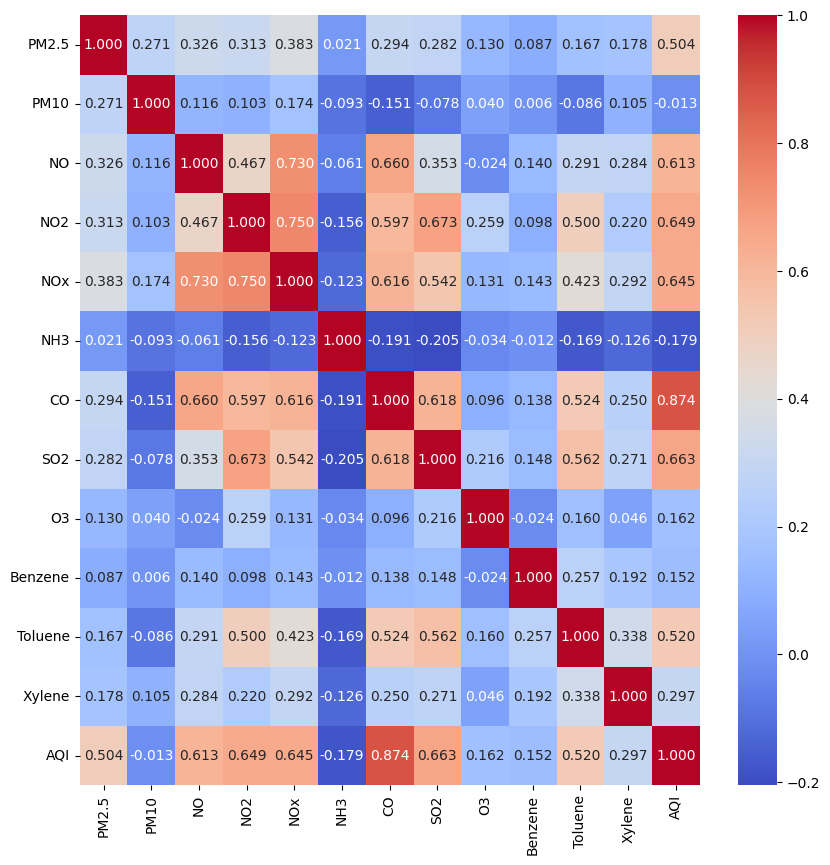

In [28]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot = True,cmap='coolwarm',fmt='.3f', xticklabels=df.columns, yticklabels=df.columns)
figure= plt.gcf()
figure.set_size_inches(10,10)
plt.show()

Liệt kê chỉ số tương quan của các cặp từ nhỏ đến lớn

In [29]:
corr_matrix.unstack().sort_values().drop_duplicates()

NH3    SO2       -0.204882
       CO        -0.190805
       AQI       -0.179318
       Toluene   -0.168597
NO2    NH3       -0.155799
                    ...   
       SO2        0.673237
NO     NOx        0.729936
NOx    NO2        0.750193
AQI    CO         0.874144
PM2.5  PM2.5      1.000000
Length: 79, dtype: float64

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=53)

knn.fit(X_train, np.ravel(y_train))
predictions = knn.predict(X_test)
print(accuracy_score(y_test, predictions))

0.01858345021037868


In [31]:
import math

def euclide_distance(x1, x2):
  distance = 0.0
  for i in range(len(x1)):
    distance += (x1[i] - x2[i]) ** 2
  return math.sqrt(distance)

class KNNClassification:
  def __init__(self, k):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  # Thực hiện phỏng đoán
  def predict(self, X):
    predictions = [self.do_predict(x) for x in X.values]
    return predictions

  def do_predict(self, x):
    # Tinh khoang cach euclide
    index = 0
    distances = list()
    for x_train in self.X_train.values:
      dist = euclide_distance(x, x_train)
      distances.append((index, dist))
      index += 1

    # Sap xep theo khoang cach euclide tang dan
    distances.sort(key=lambda x: x[1])

    # Lay ra K neighbors gan nhat
    index_neighbors = list()
        
    for i in range(self.k):
      index_neighbors.append(distances[i][0])

      # Lay ra labels cua K neighbors
       
    labels = list()
    count = 0
    for value in self.y_train.values:
      if count in index_neighbors:
        labels.append(value)
        index_neighbors.remove(count)
      count += 1
        
        # tim labels co so lan xuat hien nhieu nhat
    counter = 0
    output = labels[0]        
    for i in labels:
      curr_frequency = labels.count(i)
      if(curr_frequency> counter):
        counter = curr_frequency
        output = i
    
    return output

In [32]:
model = KNNClassification(13)
model.fit(X_train, y_train)
y_pr1 = model.predict(X_test)
print(accuracy_score(y_test, y_pr1))
# print(model.score(X_test, y_test))

0.024894810659186535
